In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
# plt.rc('xtick', labelsize=8)
# plt.rc('ytick', labelsize=8)
# plt.rc('axes', labelsize=8)

import sys
import pathlib

# in jupyter (lab / notebook), based on notebook path
module_path = str(pathlib.Path.cwd().parents[0] / "py")
# # in standard python
# module_path = str(pathlib.Path.cwd(__file__).parents[0] / "common")

if module_path not in sys.path:
    sys.path.append(module_path)

import common.viz

In [2]:
# Trace state variables, actions etc. 
# for a particular experiment instance

env_name = "sense"
timeslots_per_day = 24
REQ_TYPE = "random"

agent_name = "agent_BC"
agent_param = "rsp10"
seed = 20211229

In [3]:
root_folder = os.path.dirname(os.getcwd())

# load trace file
env_tag = env_name + '_t' + str(timeslots_per_day) + '_' + REQ_TYPE
agent_tag = agent_name + '_' + agent_param

# experiment tag
# name of folder to save models and results
experiment_type_tag = env_tag  + "-" + agent_tag
experiment_instance_tag =  experiment_type_tag + '-' + str(seed)

# Folder/file to load test results
test_results_folder = os.path.join(root_folder,"results", experiment_type_tag, "test")
assert os.path.exists(test_results_folder), "'" + test_results_folder + "' folder does not exist"
test_log_file = os.path.join(test_results_folder, experiment_instance_tag + '-test.npy')   

# Load data
experiment_instance_result = np.load(test_log_file,allow_pickle='TRUE').item()    

In [4]:
first_level_keys = list(experiment_instance_result.keys())
second_level_keys = list(experiment_instance_result[first_level_keys[0]].keys())
third_level_keys = list(experiment_instance_result[first_level_keys[0]][second_level_keys[0]].keys())

print("Choose a location from:\t", first_level_keys)
# print("Choose a year from:\t", second_level_keys)

Choose a location from:	 ['tokyo']
Choose a year from:	 [1995, 1996, 1997, 1998, 1999]


In [5]:
location = "tokyo"

In [6]:
year_list = list(experiment_instance_result[location].keys())

tokyo


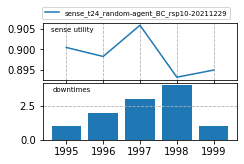

In [8]:
# Latex single column settings
single_column_figure_width = 3.487
double_column_figure_width = 7

fig_width = single_column_figure_width
fig_height = fig_width / 1.618

fig, axs = plt.subplots(nrows=2,
                        ncols=1,
                        figsize=[fig_width,fig_height], # in inches
                        sharex=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.05)

#######################################################################################
# # left  = 0.125  # the left side of the subplots of the figure
# # right = 0.9    # the right side of the subplots of the figure
# # bottom = 0.1   # the bottom of the subplots of the figure
# # top = 0.9      # the top of the subplots of the figure
# # wspace = 0.2   # the amount of width reserved for blank space between subplots
# # hspace = 0.2   # the amount of height reserved for white space between subplots
#######################################################################################

sense_reward_ax  = axs[0]
downtimes_ax = axs[1]

print(location)

# avg_sense_reward
data = [experiment_instance_result[location][year]['sense_reward_log'].mean() for year in year_list]
sense_reward_ax.plot(year_list, data, label=experiment_instance_tag)
    
sense_reward_ax.text(0.15,0.85, 'sense utility', 
         size='x-small', ha="center", 
         transform=sense_reward_ax.transAxes)
# sense_reward_ax.set_title('sense utility')
# sense_reward_ax.set_ylabel('sense utility')    
sense_reward_ax.legend(loc="lower left",
                       ncol=1,
                       fontsize='x-small',
                       bbox_to_anchor=(-0.02,1,1,1))
sense_reward_ax.grid(which='major', axis='x', linestyle='--')

# Downtimes
data = [experiment_instance_result[location][year]['downtimes'] for year in year_list]
width = 0.8  # the width of the bars 
xroot = np.array(year_list) # label locations
xoffset = 0
downtimes_ax.bar(xroot+xoffset*width, data, width,
                 label=experiment_instance_tag,
                 error_kw=dict(ecolor='black', lw=1, capsize=0.5, capthick=width*0.5, alpha=0.2))

# downtimes_ax.set_xticks(year_list[::5])
# downtimes_ax.set_xticklabels(year_list[::5], rotation=0)

downtimes_ax.text(0.15,0.85, 'downtimes', 
                 size='x-small', ha="center", 
                 transform=downtimes_ax.transAxes)
# downtimes_ax.set_title('downtimes')
# downtimes_ax.set_ylabel('downtimes')    
# downtimes_ax.legend(loc="lower left",
#                    ncol=1,
#                    bbox_to_anchor=(0,0.8,1,1))
downtimes_ax.grid(which='major', axis='y', linestyle='--')
# fig.savefig('./figures/figure.png', dpi=300, bbox_inches='tight', transparent=True)